# Breast Cancer Prediction


In [113]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

bc = load_breast_cancer()

In [88]:
print(bc.DESCR)


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

# data set info  

In [83]:
bc.target.shape

(569,)

In [90]:
bc.data.shape

(569, 30)

# preprocessing


In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bc.data,bc.target, test_size=0.2)

In [92]:
# recognize size of test and train data

print(f" feature => train:{X_train.shape} - test: {X_test.shape}")
print(f" lable => train:{y_train.shape} - test: {y_test.shape}")

 feature => train:(455, 30) - test: (114, 30)
 lable => train:(455,) - test: (114,)


# Data Normalise

In [93]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range= (0,1))
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

# Classification

In [94]:
from sklearn.metrics import accuracy_score , precision_score , recall_score
def cal_metrics(y_train,y_test , y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_true= y_train, y_pred= y_pred_train)
    acc_test = accuracy_score(y_true= y_test, y_pred= y_pred_test)
    p = precision_score(y_true= y_test, y_pred= y_pred_test)
    r= recall_score(y_true= y_test, y_pred= y_pred_test)

    print(f" acc_train :{acc_train} - acc_test :{acc_test} - precision: {p} - recall:{r}")

    return acc_train , acc_test , p ,r

## 1. Naive Bayes

In [95]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [96]:
y_pred_train = gnb.predict(X_train)
y_pred_test= gnb.predict(X_test)

acc_train_gnb , acc_test_gnb , p_gnb ,r_gnb  = cal_metrics(y_train,y_test , y_pred_train, y_pred_test)

 acc_train :0.945054945054945 - acc_test :0.9473684210526315 - precision: 0.918918918918919 - recall:1.0


# KNN

In [97]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 8 , algorithm='kd_tree', leaf_size= 28  )
knn.fit(X_train , y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [98]:
y_pred_train = knn.predict(X_train)
y_pred_test= knn.predict(X_test)

acc_train_knn , acc_test_knn , p_knn,r_knn = cal_metrics(y_train,y_test , y_pred_train, y_pred_test)

 acc_train :0.9736263736263736 - acc_test :0.9649122807017544 - precision: 0.9444444444444444 - recall:1.0


# Decision Tree

In [99]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth= 128, min_samples_split= 2, criterion= 'gini')
dt.fit(X_train ,y_train)

DecisionTreeClassifier(max_depth=128)

In [100]:
y_pred_train = dt.predict(X_train)
y_pred_test= dt.predict(X_test)

acc_train_dt , acc_test_dt , p_dt ,r_dt  = cal_metrics(y_train,y_test , y_pred_train, y_pred_test)

 acc_train :1.0 - acc_test :0.9122807017543859 - precision: 0.9027777777777778 - recall:0.9558823529411765


# Random Forest

In [101]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 500 , max_depth=64 , min_samples_split=8)
rf.fit(X_train , y_train)

RandomForestClassifier(max_depth=64, min_samples_split=8, n_estimators=500)

In [102]:
y_pred_train = rf.predict(X_train)
y_pred_test= rf.predict(X_test)

acc_train_rf , acc_test_rf , p_rf ,r_rf  = cal_metrics(y_train,y_test , y_pred_train, y_pred_test)

 acc_train :0.9978021978021978 - acc_test :0.9385964912280702 - precision: 0.9178082191780822 - recall:0.9852941176470589


# SVM

In [103]:
from sklearn.svm import SVC
sv = SVC(kernel= 'poly')
sv.fit(X_train,y_train)

SVC(kernel='poly')

In [104]:
y_pred_train = sv.predict(X_train)
y_pred_test= sv.predict(X_test)

acc_train_sv , acc_test_sv , p_sv ,r_sv  = cal_metrics(y_train,y_test , y_pred_train, y_pred_test)

 acc_train :0.989010989010989 - acc_test :0.9649122807017544 - precision: 0.9444444444444444 - recall:1.0


# Logistics Regression

In [105]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [106]:
y_pred_train = lr.predict(X_train)
y_pred_test= lr.predict(X_test)

acc_train_lr, acc_test_lr , p_lr ,r_lr  = cal_metrics(y_train,y_test , y_pred_train, y_pred_test)

 acc_train :0.9714285714285714 - acc_test :0.9473684210526315 - precision: 0.918918918918919 - recall:1.0


# ANN

In [107]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes= 1024 , activation='identity' , solver= 'lbfgs', batch_size= 64)
ann.fit(X_train ,y_train)

MLPClassifier(activation='identity', batch_size=64, hidden_layer_sizes=1024,
              solver='lbfgs')

In [108]:
y_pred_train = ann.predict(X_train)
y_pred_test= ann.predict(X_test)

acc_train_ann , acc_test_ann , p_ann ,r_ann  = cal_metrics(y_train,y_test , y_pred_train, y_pred_test)

 acc_train :1.0 - acc_test :0.9385964912280702 - precision: 0.9295774647887324 - recall:0.9705882352941176


# Comparison

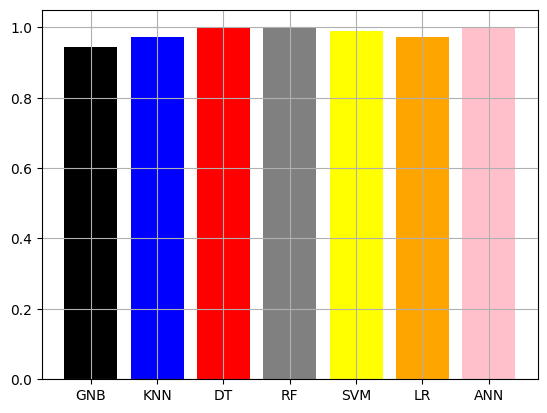

In [109]:
import matplotlib.pyplot as plt

acc_train = [acc_train_gnb,acc_train_knn,acc_train_dt,acc_train_rf,acc_train_sv,acc_train_lr,acc_train_ann ]
title = ['GNB','KNN','DT','RF','SVM','LR','ANN']
color= ['black','blue','red','gray','yellow','orange','pink']
plt.bar(title,acc_train , color = color)
plt.grid()
plt.show()


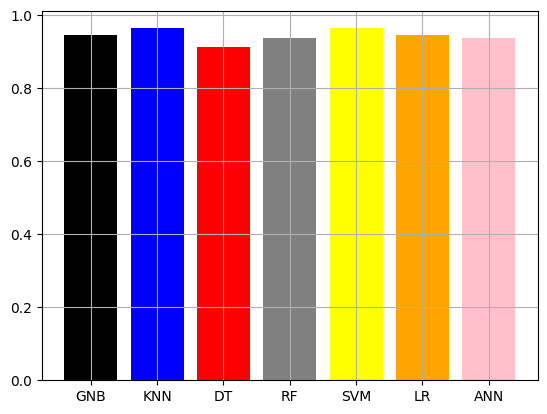

In [110]:
import matplotlib.pyplot as plt

acc_test = [acc_test_gnb,acc_test_knn,acc_test_dt,acc_test_rf,acc_test_sv,acc_test_lr,acc_test_ann ]
title = ['GNB','KNN','DT','RF','SVM','LR','ANN']
color= ['black','blue','red','gray','yellow','orange','pink']
plt.bar(title,acc_test , color = color)
plt.grid()
plt.show()

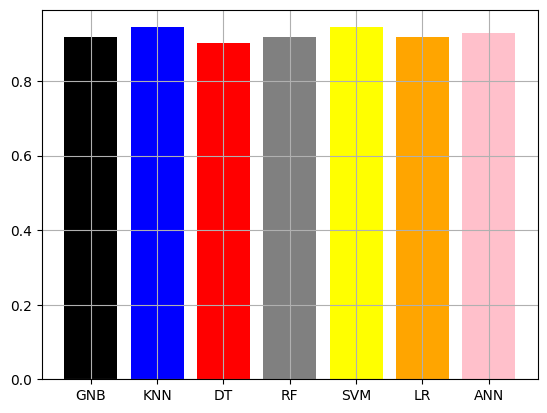

In [111]:
import matplotlib.pyplot as plt

P = [p_gnb,p_knn,p_dt,p_rf,p_sv,p_lr,p_ann ]
title = ['GNB','KNN','DT','RF','SVM','LR','ANN']
color= ['black','blue','red','gray','yellow','orange','pink']
plt.bar(title,P, color = color)
plt.grid()
plt.show()

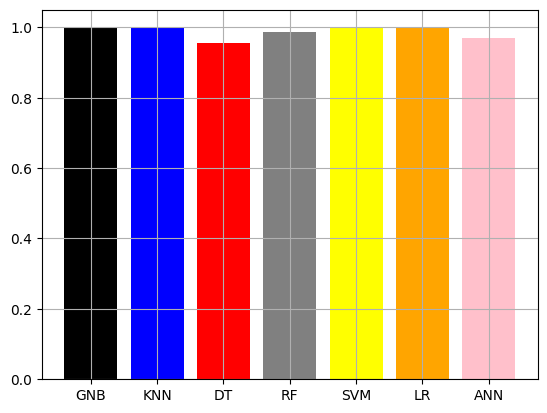

In [112]:
import matplotlib.pyplot as plt

R = [r_gnb,r_knn,r_dt,r_rf,r_sv,r_lr,r_ann ]
title = ['GNB','KNN','DT','RF','SVM','LR','ANN']
color= ['black','blue','red','gray','yellow','orange','pink']
plt.bar(title,R , color = color)
plt.grid()
plt.show()